<a href="https://colab.research.google.com/github/BrandonPalacios/Health_Evaluation_for_Newborn_using_SVM_and_NaiveBayes/blob/main/SVM__vs_NaiveBayes_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación del estado de salud de un bebé durante el parto

Brandon Uriel Palacios Méndez

### Análisis Exploratorio

In [ ]:
# Importamos las librerias
import numpy as np
import pandas as pd

# Librerías de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

In [ ]:
# Cargamos el fichero con la información
file = '/content/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Revisamos la información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

Nuestro dataset cuenta con 26 columnas todas del tipo númerico int64 y float64.

In [ ]:
# Revisamos el tipo de datos
data.agg(['nunique'])

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
nunique,2126,979,1064,48,22,96,19,75,57,87,...,109,86,18,9,88,103,95,133,3,2


In [ ]:
# Eliminamos las variables que no son necesarias
data = data.drop(['ID','b','e','DR'], axis=1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [ ]:
# Analizamos si existen nulos en el dataset
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

In [ ]:
# Medidas de centralización, localización y dispersión
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


### Análisis Gráfico

0    1655
1     471
Name: Target, dtype: int64


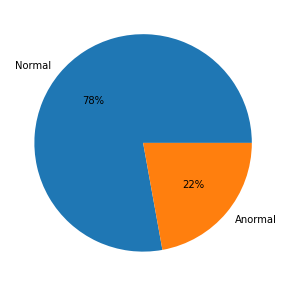

In [ ]:
# Gráfico de Distribución de las Frecuencias del Target
a, b = data['Target'].value_counts()
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.pie([a, b], labels=['Normal', 'Anormal'], autopct='%1.0f%%')
print(data['Target'].value_counts())

**La proporción es 78% de estados normales y 22% de estados anormales.**


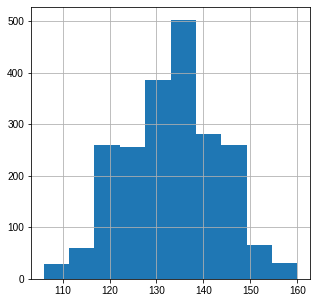

In [ ]:
# Histograma de LBE
fig, ax= plt.subplots(1,1,figsize=(5,5))
plt.style.use('seaborn')
data['LBE'].hist(ax=ax);

La línea base del ritmo cardiaco de los fetos se encuentra en su mayoría entre 130 y 140 latidos por minuto.

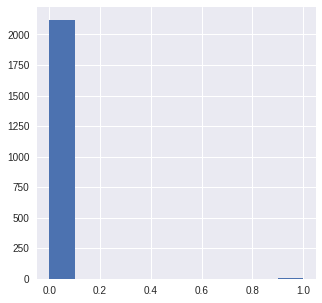

In [ ]:
# Histograma de DS
fig, ax= plt.subplots(1,1,figsize=(5,5))
plt.style.use('seaborn')
data['DS'].hist(ax=ax);

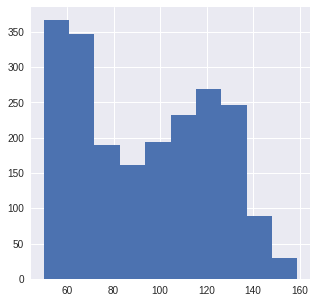

In [ ]:
# Histograma de Min
fig, ax= plt.subplots(1,1,figsize=(5,5))
plt.style.use('seaborn')
data['Min'].hist(ax=ax);

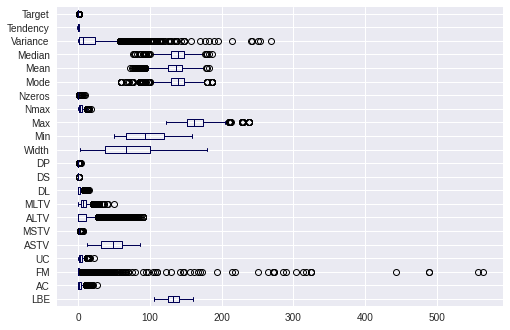

In [ ]:
# Box Plot para cada variable
data_box_plot = data.boxplot(vert=False, color='#000054')

Llama la atención que la variable 'FM' que es el número de movimientos fetales por segundo presenta muchos outliers, por lo que sería interesante realizar un análisis sobre esa variable.

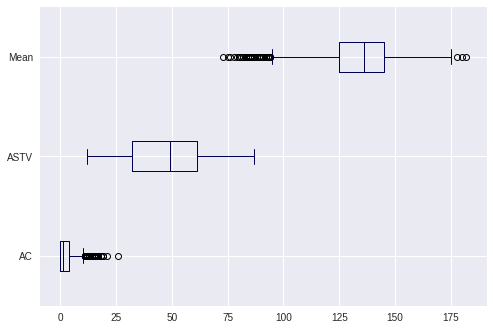

In [ ]:
# Box Plot para las columnas AC, ASTV y Mean
data_box_plot = data.boxplot(column=['AC', 'ASTV','Mean'], vert=False, color='#000054')

## Algorítmo Naive Bayes

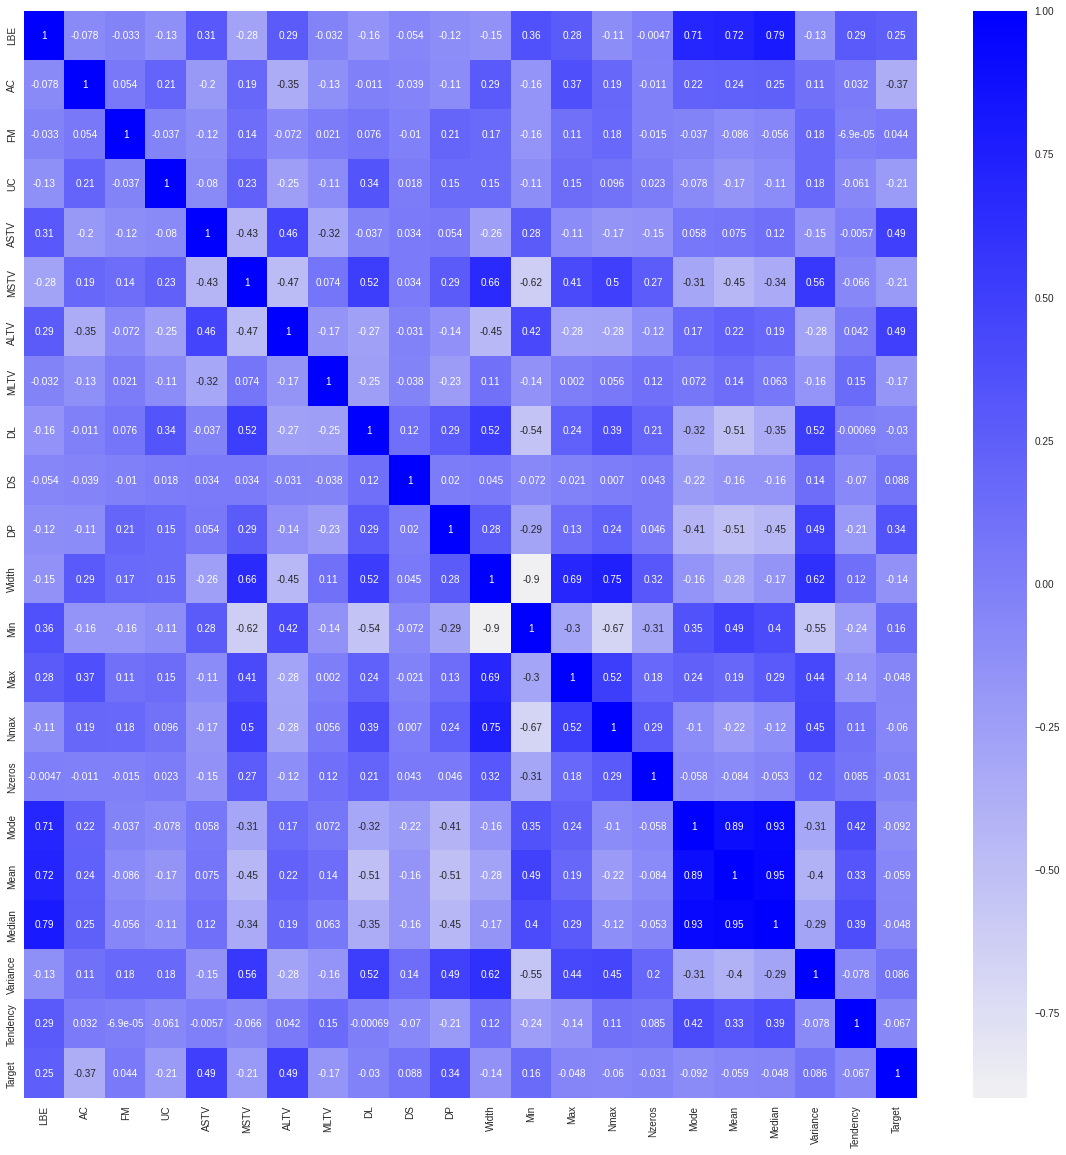

In [ ]:
# Revisamos la Matriz de Correlación del dataset
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette('light:b', as_cmap=True)
sns.heatmap(corr,annot=True,cmap=cmap)

Las variables que tienen una mayor correlación con la variable ‘Target’ son:
1.   **ASTV:** Porcentaje de tiempo con variabilidad anormal a corto plazo
2.   **ALTV:** Porcentaje de tiempo con variabilidad anormal a largo plazo
3.   **DP:** Número de desaceleraciones prolongadas por segundo






Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

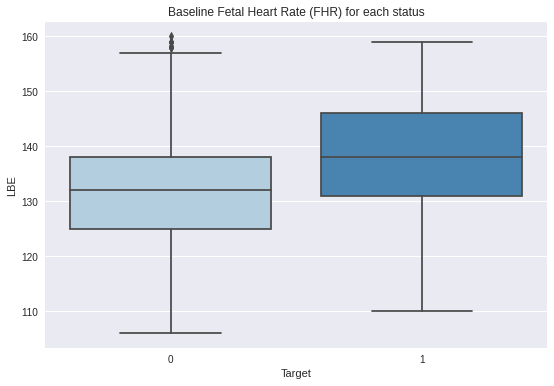

In [ ]:
# Relación univariante del target con las variables explicativas
plt.figure(figsize=(9,6))
sns.boxplot(x= 'Target', y='LBE', data= data, palette='Blues')
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

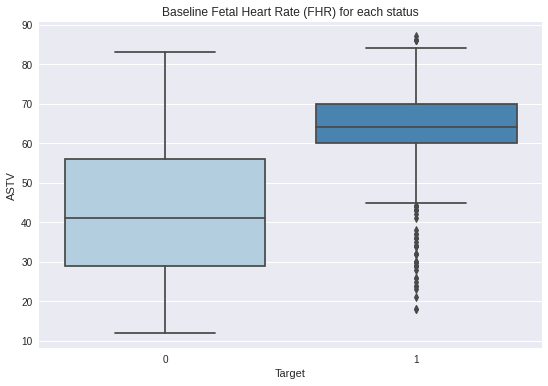

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x= 'Target', y='ASTV', data= data, palette='Blues')
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

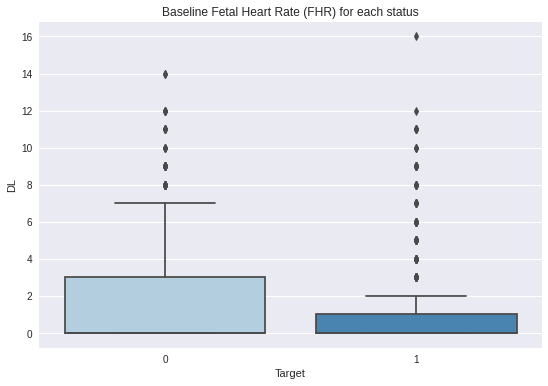

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x= 'Target', y='DL', data= data, palette='Blues')
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

### Fase de Muestreo

**Con base en las características del dataset, la técnica de modelización más óptima para nuestro modelo es la *Gaussiana.***

In [ ]:
# Realizamos el muestreo, entrenamiento y test
from sklearn.model_selection import train_test_split
x = data.loc[:, data.columns != 'Target']
y = X = data.loc[:, data.columns == 'Target']
# Asignamos un valor de 0.4 para el conjunto de test y poder tener 0.6 en el conjunto de entrenamiento.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.40, random_state=0)


Asignamos un valor de 0.4 al conjunto de test para tener el 0.6 en el conjunto de entrenamiento.

### Modelización

In [ ]:
#  Utilizaremos la técnica Gaussiana para la modelización.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(x_train, y_train.values.ravel())
# Realizamos las predicciones
y_pred_train = modelNB.predict_proba(x_train)
y_pred_test = modelNB.predict_proba(x_test)


### Validación

In [ ]:
# Utilizaremos la curva ROC para reaalizar la validación del modelo.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Curva ROC y AUC para training
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Curva ROC y AUC para test
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

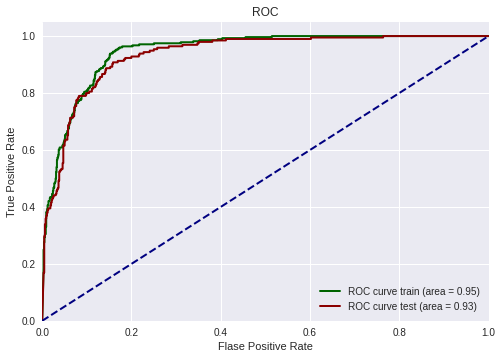

In [ ]:
# Gráfica de la Curva ROC
plt.figure()
lw= 2
plt.plot(fpr_train, tpr_train, color='darkgreen', lw=lw, label='ROC curve train (area = %0.2f)' % roc_auc_train,)
plt.plot(fpr_test, tpr_test, color='darkred', lw=lw, label= "ROC curve test (area = %0.2f)" % roc_auc_test,)

plt.plot([0, 1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

**Podemos observar que el modelo tiene un ligero sobreajuste ya que el conjunto de entrenamiento se encuentra por encima del conjunto de test, sin embargo, al ser un sobre ajuste muy pequeño y obtener un área bajo la curva con unos valores muy buenos (0.95, 0.93) podemos asumir que el modelo es óptimo para realizar la predicción.**

## Algorítmo Support Vector Machine (SVM)

In [ ]:
# Importamos las librerías para SVM, el resto ya se importaron en pasos anteriores
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Realizamos el ajuste con el algortimo SVM
# SVM rbf (default)
svm_rbf = svm.SVC(C = 1 
                    ,kernel='rbf' 
                    ,probability = True) 

# Ajuste del modelo
svm_rbf.fit(x_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, probability=True)

In [ ]:
# VALIDACION CON EL CONJUNTO DE TEST 
y_proba_train_svm = svm_rbf.predict_proba(x_train)
y_proba_test_svm = svm_rbf.predict_proba(x_test)

In [ ]:
# Entrenamiento
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_train_svm[:, 1])
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)
 
# Test
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

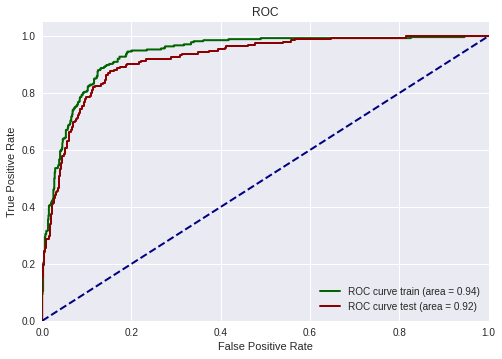

In [ ]:
# Curva ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve train (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Al utilizar los valor por default de la función SVC del algoritmo SVM notamos que la calidad de nuestro modelo disminuyo y este presenta un sobreajuste de 0.02, lo cual se podría mejorar. Comparando con los modelos obtenidos con la función Grid Search vemos que el modelo por default se queda muy por detrás, por lo tanto, se puede concluir que cada modelo debe ser ajustado con precisión para obtener los mejores resultados posibles y no podemos utilizar el mismo para todos los modelos.

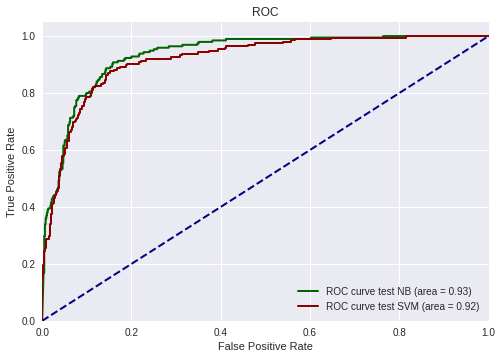

In [ ]:
# Comparamos los resultados de la curva ROC y el AUC para el conjunto test con Naive Bayes y SVM.
# Curva ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_test, tpr_test, color='darkgreen', lw=lw, label= "ROC curve test NB (area = %0.2f)" % roc_auc_test,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve test SVM (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Podemos observar que con los parámetros por default en SVM el mejor modelo sería con el algoritmo Naive Bayes, sin embargo, si utilizamos los hiperparámetros correctos para el algoritmo SVM podríamos un valor AUC superior que Naive Bayes.

## Fase Final

Para mejorar la precisión del modelo realizamos una búsqueda con la función Grid Search para determinar cuales son los hiperparámetros óptimos para aumentar el AUC.

In [ ]:
# Utilizamos la función Grid Search para encontrar los hiperparámetros óptimos para el modelo
from sklearn.model_selection import GridSearchCV
 
# Hiperparametros
param_grid = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1,1,10]},
    {"kernel": ["linear"], "C": [0.1,1,10]},
    {"kernel": ["poly"], "C": [0.1,1,10], "degree": [2,3]},
]
 
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid, 
        scoring    = 'roc_auc', 
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

grid.fit(X = x_train, y = y_train)

# Revisamos los resultados del grid

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,NaN,linear,NaN,0.961140,0.009888,0.971758,0.004486
5,10,0.0001,rbf,NaN,0.960422,0.005075,0.982315,0.001190
6,0.1,NaN,linear,NaN,0.959171,0.011102,0.968995,0.006302
8,10,NaN,linear,NaN,0.957626,0.012830,0.971892,0.004544
3,1,0.0001,rbf,NaN,0.949020,0.008383,0.962050,0.001849
4,10,0.001,rbf,NaN,0.947823,0.005539,0.998932,0.000856
2,1,0.001,rbf,NaN,0.944961,0.004728,0.988773,0.000816
14,10,NaN,poly,3,0.942557,0.010176,0.952633,0.005858
13,10,NaN,poly,2,0.937084,0.009289,0.944851,0.004812
1,0.1,0.0001,rbf,NaN,0.929805,0.012450,0.935924,0.003403


Gracias a la función Grid Search podemos observar que los hiperparámetros más óptimos para nuestro modelo de SVM es con un kernel lineal y un parémtro C de 1, de esta manera obtendríamos el auc más alto y se tendría el menor overfitting posible.

In [ ]:
# Ajustamos el modelo SVM con los hiperparámetros más óptimos obtenidos con la función Grid Search.
# SVM Lineal
svmLineal = svm.SVC(C = 1 
                    ,kernel='linear'
                    ,probability = True) 

# Ajuste del modelo
svmLineal.fit(x_train, y_train)

# VALIDACION CON EL CONJUNTO DE TEST 
y_proba_train_svm2 = svmLineal.predict_proba(x_train)
y_proba_test_svm2 = svmLineal.predict_proba(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Entrenamiento
fpr_train_svm2, tpr_train_svm2, _ = roc_curve(y_train, y_proba_train_svm2[:, 1])
roc_auc_train_svm2 = auc(fpr_train_svm2, tpr_train_svm2)
# 
# Test
fpr_test_svm2, tpr_test_svm2, _ = roc_curve(y_test, y_proba_test_svm2[:, 1])
roc_auc_test_svm2 = auc(fpr_test_svm2, tpr_test_svm2)

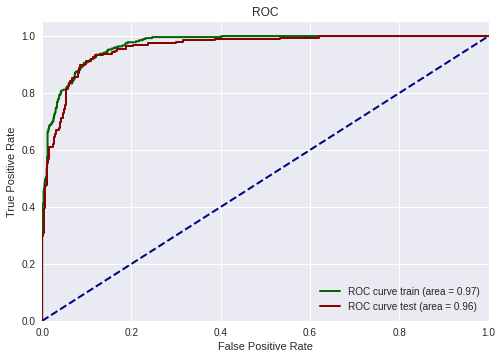

In [ ]:
# Curva ROC y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm2,tpr_train_svm2,color="darkgreen",lw=lw,label="ROC curve train (area = %0.2f)" % roc_auc_train_svm2,)
plt.plot(fpr_test_svm2,tpr_test_svm2,color="darkred",lw=lw,label="ROC curve test (area = %0.2f)" % roc_auc_test_svm2,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Podemos comprobar que utilizando los hiperparámetros correctos, el modelo puede ser mucho mejor que si utilizamos los valores default.
En este caso, pasamos el valor AUC de un 0.93 a un 0.97 para el conjunto de entrenamiento y pasamos de 0.92 a 0.96 para el conjunto de test, esto nos indica que hubo una gran mejora cuando cambiamos el kernel.

In [ ]:
# Predicciones test
# ==============================================================================
predicciones_train = svmLineal.predict(x_train)
predicciones_test = svmLineal.predict(x_test)

In [ ]:
# Verificamos el accuracy del modelo.
accuracy = accuracy_score(y_true = y_train,y_pred = predicciones_train,normalize = True)
print(f"El accuracy de training es: {100*accuracy}%")
print()
accuracy = accuracy_score(y_true = y_test,y_pred = predicciones_test,normalize = True)
print(f"El accuracy de test es: {100*accuracy}%")
print()
# Matriz de confusión
confusion_matrix = pd.crosstab(
    y_test.Target.ravel(),
    predicciones_test,
    rownames=['Real'],
    colnames=['Predicción']
)
print(confusion_matrix)

El accuracy de training es: 92.23529411764706%

El accuracy de test es: 89.77673325499413%

Predicción    0    1
Real                
0           625   31
1            56  139


Tenemos un accuracy del 89% para el conjunto de test, lo cual es un muy buen resultado y nos permite validar la precisión del modelo.

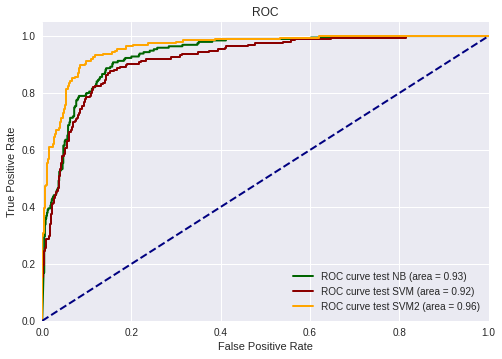

In [ ]:
# Comparamos los la precisión de los 3 algoritmos utilizados.
plt.figure()
lw = 2

plt.plot(fpr_test, tpr_test, color='darkgreen', lw=lw, label= "ROC curve test NB (area = %0.2f)" % roc_auc_test,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve test SVM (area = %0.2f)" % roc_auc_test_svm,)
plt.plot(fpr_test_svm2,tpr_test_svm2,color="orange",lw=lw,label="ROC curve test SVM2 (area = %0.2f)" % roc_auc_test_svm2,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Al realizar la comparación entre los 3 modelos que realizamos, podemos notar la diferencia de precisión  entre ellos, siendo el modelo que ajustamos con la función Grid Search representado en color naranja la que tiene una mayor área bajo la curva, por lo tanto sería nuestro modelo a utilizar para realizar las evaluaciones del estado de salud de los bebés, con un accuracy del casi 90%.